In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file
data=pd.read_csv("airqualitydata.csv")

In [3]:
#displaying the random rows 
data.sample(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1916,Ahmedabad,2020-03-31,29.97,98.96,3.85,22.08,13.64,NaN,3.85,32.01,36.86,7.00,29.53,2.50,145.0,Moderate
5821,Bengaluru,2019-03-08,69.62,141.49,25.80,46.88,58.06,18.21,1.32,7.02,49.42,2.51,7.46,NaN,167.0,Moderate
8532,Chennai,2016-11-29,91.15,NaN,5.66,31.00,18.54,NaN,0.02,4.13,29.57,0.26,0.21,NaN,210.0,Poor
24269,Patna,2016-07-10,39.08,NaN,15.29,13.49,28.78,NaN,1.30,6.30,12.80,0.13,0.59,0.32,137.0,Moderate
6988,Brajrajnagar,2019-01-07,115.30,175.98,17.55,28.26,40.47,62.08,3.04,15.34,7.30,12.01,NaN,NaN,278.0,Poor


In [4]:
data.shape

(29531, 16)

<h5>The data set contains total 29531 rows and 16 columns.</h1>

In [5]:
#Displaying the all the columns of the data set
print("Different features or column names")
for i in data.columns:
    print(i)

Different features or column names
City
Date
PM2.5
PM10
NO
NO2
NOx
NH3
CO
SO2
O3
Benzene
Toluene
Xylene
AQI
AQI_Bucket


<h4>Description of the Features</h4>
<h5>1).AQI</h5>
<p>The Air Quality Index (AQI) is a number that measures how clean or polluted the air is. It's used to warn people about the health risks of breathing polluted air.<br>Greater the value of AQI ,higher the pollution rate.</p>
<h5>2).PM2.5</h5>
<p>PM2.5, or particulate matter 2.5, is a term for tiny particles or droplets in the air that are 2.5 microns or less in width.<br>The largest PM2.5 particles are about 30 times smaller than a human hair.<br>PM2.5 can damage lung cells.</p>
<h5>3).PM10</h5>
<p>PM10 is a measure of the amount of inhalable particles in the air that are 10 micrometers or less in diameter.<br>PM10 can cause serious health effects, including heart and lung disease.</p>
<h5>4).NO</h5>
<p>NO(nitrogen oxide) contributes to a higher Air Quality Index (AQI) because it is a pollutant that can react with other chemicals in the air to form ozone and particulate matter.<br>Breathing air with high NO levels can irritate airways, particularly for individuals with respiratory conditions like asthma.</p>
<h5>5).NO2</h5>
<p>NO2 plays a crucial role in the photochemical process that creates ground-level ozone, another significant air pollutant which further contributes to a poor AQI. <br>NO2 is a major irritant to the airways, causing coughing, wheezing, and breathing difficulties, especially for people with asthma or other respiratory conditions.</p>
<h5>6).NOx</h5>
<p>NOx reacts with volatile organic compounds (VOCs) in the presence of sunlight to produce ground-level ozone, a key factor in elevated AQ</p>
<h5>7).NH3</h5>
<p>Ammonia reacts with acidic pollutants in the atmosphere, forming fine particulate matter (PM2.5) which can penetrate deep into the lungs and cause respiratory issues. </p>
<h5>8).CO</h5>
<p>Inhaling high levels of CO can reduce the amount of oxygen carried by the blood, leading to health issues</p>
<h5>9).SO2</h5>
<p>SO2, whether of volcanic or anthropogenic origin, is a toxic gas that, when present in high concentrations in the environment, alters air quality and has a significant impact on the respiratory and cardiovascular health of the population, even at great distances from the source of emissions.</p>
<h5>10).O3</h5>
<p>While ozone in the stratosphere protects us from harmful UV rays, ground-level ozone is considered a pollutant. </p>
<h5>11).Benzene</h5>
<p>Benzene is a known carcinogen, meaning exposure can increase the risk of cancer, particularly leukemia, even at low levels. </p>
<h5>12).Toluene</h5>
<p>Exposure to toluene can cause irritation to the eyes, nose, and throat, along with symptoms like headaches, dizziness, and nausea, especially at high concentrations. </p>
<h5>13).Xylene</h5>
<p>Inhaling xylene can cause eye, nose, and throat irritation, even at relatively low concentrations, impacting health directly and contributing to a lower AQI. </p>

In [6]:
#columns of the data set are 
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
#checking the total null values
data.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [8]:
#percentage of the missing values 
percentage=(data.isna().mean()*100).sort_values(ascending=False)

In [9]:
percentage

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

<Axes: >

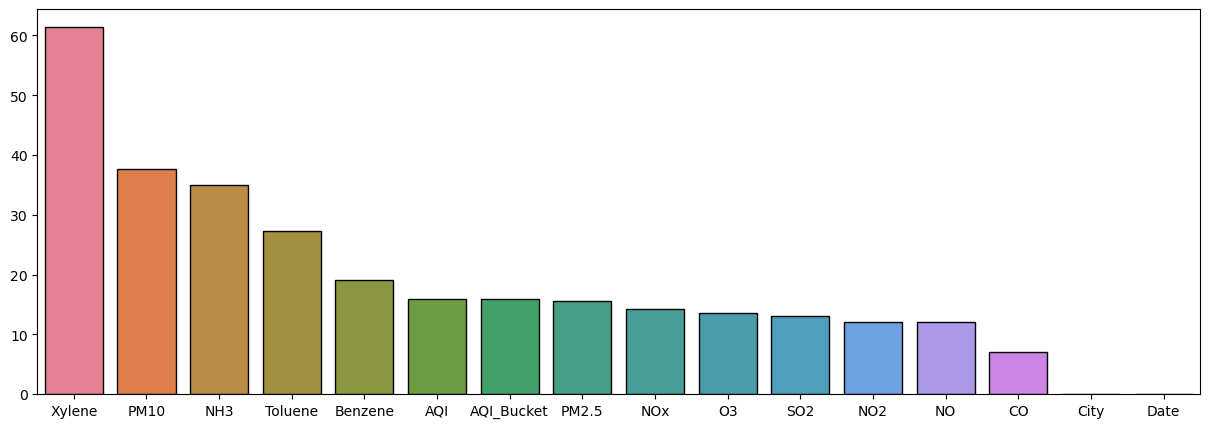

In [10]:
plt.figure(figsize=(15,5))
colors = sns.color_palette("husl", len(percentage))
sns.barplot(data=percentage,palette=colors,edgecolor="black")

In [11]:
#checking the unique values in the columns city
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [12]:
#Total number of  unique cities
data.City.nunique()  

26

In [13]:
#counts of each cities in the data set
data['City'].value_counts()

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64

In [14]:
data['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [15]:
data['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

In [16]:
##Underastanding the Statistical description of the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [17]:

data[data['AQI'].isna()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29374,Visakhapatnam,2020-01-27,59.32,117.45,3.11,19.17,12.72,11.62,0.92,8.35,29.25,3.13,7.13,1.00,NaN,NaN
29400,Visakhapatnam,2020-02-22,31.82,70.91,2.34,23.92,14.56,12.41,0.58,7.58,26.08,2.59,5.82,1.15,NaN,NaN
29409,Visakhapatnam,2020-03-02,52.80,104.45,3.24,43.27,24.56,17.49,1.24,9.08,17.61,4.44,9.25,2.75,NaN,NaN
29463,Visakhapatnam,2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#dropping the rows that has null values in "AQI" column
#data=data.dropna(subset=['AQI'])

In [19]:
#data.shape

In [20]:
#Checking whether is there any duplicate rows exist or not
data.duplicated().sum()

0

In [21]:
data.City.nunique()

26

In [22]:
data['Date'] = pd.to_datetime(data['Date'])

# Get the minimum and maximum dates
min_date = data['Date'].min()
max_date = data['Date'].max()

In [23]:
print(f"Min_year {min_date} and Max_year {max_date}")

Min_year 2015-01-01 00:00:00 and Max_year 2020-07-01 00:00:00


In [24]:
max_date

Timestamp('2020-07-01 00:00:00')

In [25]:
data.sample()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2974,Amaravati,2020-03-25,16.77,35.65,1.38,4.29,3.41,7.58,1.47,18.95,27.74,0.07,0.33,0.1,101.0,Moderate


In [26]:
def check_missing_years(df, city_column, date_column, start_year, end_year):
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Extract the year from the date column
    df['year'] = df[date_column].dt.year
    
    # Create a set of all years in the given range
    all_years = set(range(start_year, end_year + 1))
    
    # Group by city and check for missing years
    missing_years = {}
    for city, group in df.groupby(city_column):
        years_present = set(group['year'])
        missing = all_years - years_present
        if missing:
            missing_years[city] = missing
    
    return missing_years

In [27]:
missing=check_missing_years(data,'City','Date',2015,2020)
missing

{'Aizawl': {2015, 2016, 2017, 2018, 2019},
 'Amaravati': {2015, 2016},
 'Amritsar': {2015, 2016},
 'Bhopal': {2015, 2016, 2017, 2018},
 'Brajrajnagar': {2015, 2016},
 'Chandigarh': {2015, 2016, 2017, 2018},
 'Coimbatore': {2015, 2016, 2017, 2018},
 'Ernakulam': {2015, 2016, 2017, 2018, 2019},
 'Guwahati': {2015, 2016, 2017, 2018},
 'Jaipur': {2015, 2016},
 'Jorapokhar': {2015, 2016},
 'Kochi': {2015, 2016, 2017, 2018, 2019},
 'Kolkata': {2015, 2016, 2017},
 'Shillong': {2015, 2016, 2017, 2018},
 'Talcher': {2015, 2016},
 'Thiruvananthapuram': {2015, 2016},
 'Visakhapatnam': {2015}}

In [29]:
data.sample()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
13969,Gurugram,2020-03-14,43.92,99.84,6.43,25.9,18.59,31.5,0.82,14.36,38.98,2.3,3.81,5.5,118.0,Moderate,2020
